In [4]:
import pandas as pd
import numpy as np

movies_df=pd.read_csv(r"C:\Users\nagab\OneDrive\Desktop\ml_1\ml(movie)\tmbd_movies_df.csv")
movies_df.head()


,Unnamed: 0,movie_id,original_title,release_date,budget,revenue,runtime,vote_average,vote_count,popularity,profit,roi,release_year,is_sucssfull
0,0,19995,Avatar,2009-12-10,237000000,2787965087,162.0,7.2,11800,150.437577,2550965087,10.76,2009,1
1,1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,169.0,6.9,4500,139.082615,661000000,2.20,2007,1
2,2,206647,Spectre,2015-10-26,245000000,880674609,148.0,6.3,4466,107.376788,635674609,2.59,2015,1
3,3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,165.0,7.6,9106,112.312950,834939099,3.34,2012,1
4,4,49529,John Carter,2012-03-07,260000000,284139100,132.0,6.1,2124,43.926995,24139100,0.09,2012,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sle


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

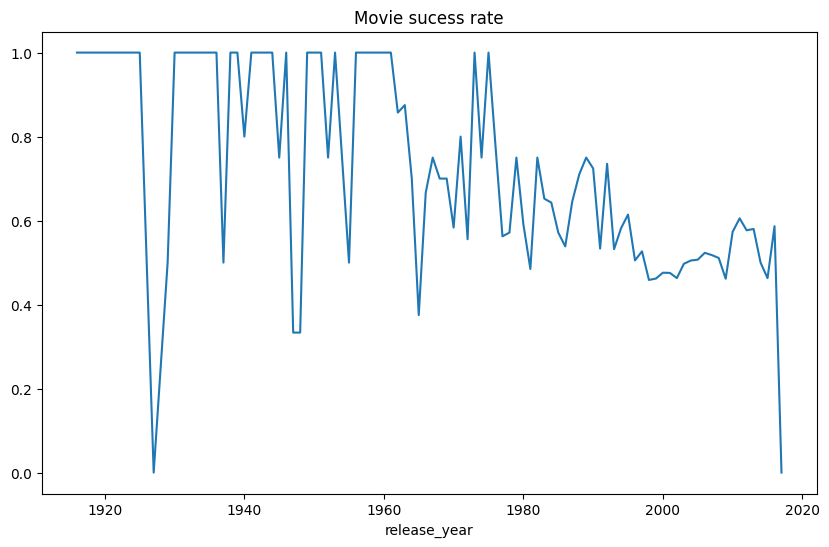

In [ ]:
sucssess_by_year= movies_df.groupby('release_year')['is_sucssfull'].mean()
plt.figure(figsize=(10,6))
sle.lineplot(x=sucssess_by_year.index,y=sucssess_by_year.values)
plt.title("Movie sucess rate")
plt.xlable("release_year")
plt.ylable("sucess_rate")
plt.grid(True)
plt.show()


In [ ]:
X = movies_df[['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year']]
y = movies_df['is_sucssfull']


In [ ]:
geners_df=pd.read_csv(r"C:\Users\nagab\OneDrive\Desktop\ml_1\ml(movie)\tmdb_generse.csv")
geners_df


,id,name
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,878.0,Science Fiction
4,12.0,Adventure
...,...,...
12183,18.0,Drama
12184,10749.0,Romance
12185,10770.0,TV Movie
12186,NaN,NaN


TOP 10 GENERSE POPULAR

C:\Users\nagab\AppData\Local\Temp\ipykernel_16548\85084306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sle.barplot(x=Top_geners.values,y=Top_geners.index,palette='coolwarm')


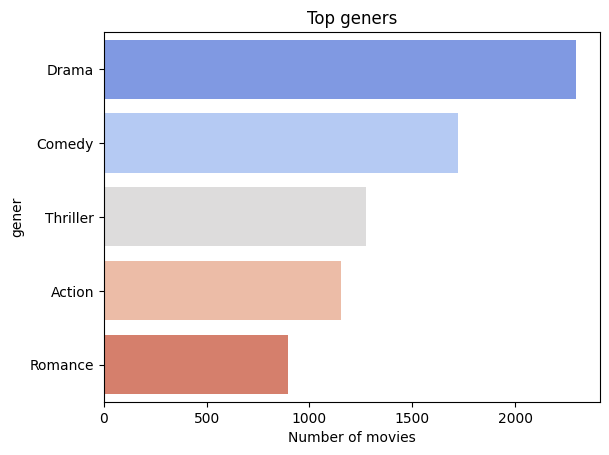

In [ ]:
Top_geners=geners_df['name'].value_counts().head(5)

plt.Figure(figsize=(10,6))
sle.barplot(x=Top_geners.values,y=Top_geners.index,palette='coolwarm')
plt.title("Top geners")
plt.xlabel("Number of movies")
plt.ylabel("gener")

plt.show()


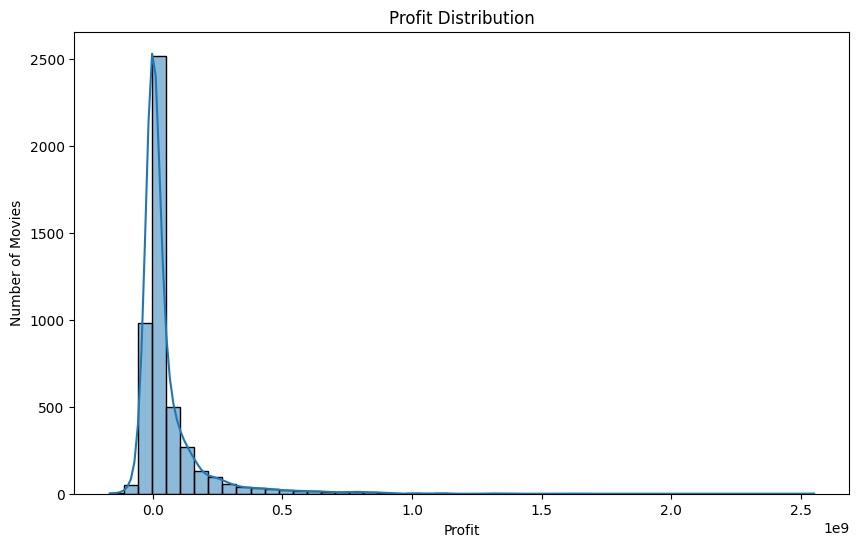

In [6]:
plt.figure(figsize=(10, 6))
sle.histplot(movies_df['profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Number of Movies")
plt.show()


In [7]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
X = movies_df[['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year']]
y = movies_df['revenue']


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows with any missing values
train_data = train_data.dropna()

# Split them back
X_train = train_data.drop("revenue", axis=1)
y_train = train_data["revenue"]


In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Missing values in X_test:", y_test.isnull().sum().sum())

Missing values in X_test: 1
Missing values in X_test: 0


In [21]:
X_test_clean=X_test.dropna()
print("Missing values in X_test:", X_test_clean.isnull().sum().sum())

Missing values in X_test: 0


In [38]:
y_test_clean=y_test.dropna()
print("Missing values in X_test:", y_test_clean.isnull().sum().sum())

Missing values in X_test: 0


In [39]:
y_pred=lr.predict(X_test_clean)


In [41]:
X_test_copy = X_test.copy()
X_test_copy["target"] = y_test

# Drop rows with missing values
X_test_copy = X_test_copy.dropna()

# Split them back again
X_test_clean = X_test_copy.drop("target", axis=1)
y_test_clean = X_test_copy["target"]

In [ ]:
print("r2_score:",r2_score(y_test_clean,y_pred))



r2_score: 0.7659492262815923


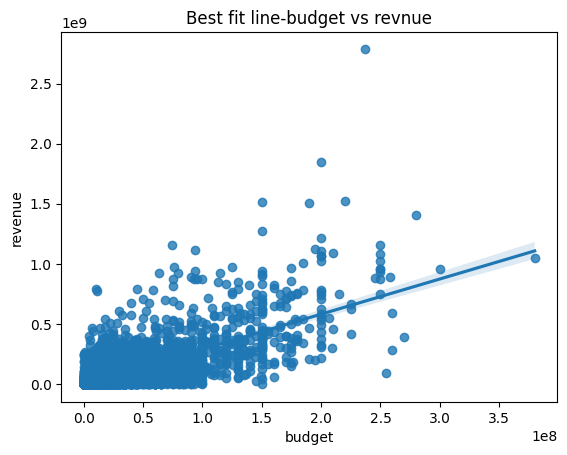

In [43]:
sle.regplot(x=movies_df['budget'],y=movies_df['revenue'])
plt.title("Best fit line-budget vs revnue")
plt.show()